## Importing the nessesary libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

In [3]:
#imports from sklearn library
from sklearn import datasets
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler,PolynomialFeatures,LabelEncoder
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression,Ridge, Lasso
from sklearn.svm import LinearSVR, SVR, NuSVR
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error,r2_score

from sklearn.ensemble import  RandomForestRegressor,IsolationForest

## importing the dataset

In [4]:
data = pd.read_csv("train.csv")
#test = pd.read_csv("test.csv")

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [6]:
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [7]:
data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [8]:
data.shape

(1460, 81)

## Explore the missing values

In [9]:
data.columns[data.isnull().sum()>0] # columns with missing value present 

Index(['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence',
       'MiscFeature'],
      dtype='object')

In [10]:
missing_cols = ["LotFrontage", "Alley","MasVnrType","MasVnrArea","BsmtQual","BsmtCond", "BsmtExposure",
                "BsmtFinType1","BsmtFinType2","Electrical", "FireplaceQu", "GarageType", "GarageYrBlt",
                "GarageFinish", "GarageQual", "GarageCond", "PoolQC", "Fence","MiscFeature"]  # List of numerical columns
for col in missing_cols:
    missing_values = data[col].isnull().sum()
    print(f"Missing values in {col}: {missing_values}")

Missing values in LotFrontage: 259
Missing values in Alley: 1369
Missing values in MasVnrType: 872
Missing values in MasVnrArea: 8
Missing values in BsmtQual: 37
Missing values in BsmtCond: 37
Missing values in BsmtExposure: 38
Missing values in BsmtFinType1: 37
Missing values in BsmtFinType2: 38
Missing values in Electrical: 1
Missing values in FireplaceQu: 690
Missing values in GarageType: 81
Missing values in GarageYrBlt: 81
Missing values in GarageFinish: 81
Missing values in GarageQual: 81
Missing values in GarageCond: 81
Missing values in PoolQC: 1453
Missing values in Fence: 1179
Missing values in MiscFeature: 1406


Text(0.5, 1.0, 'MISSINGNESS IN THE DATA')

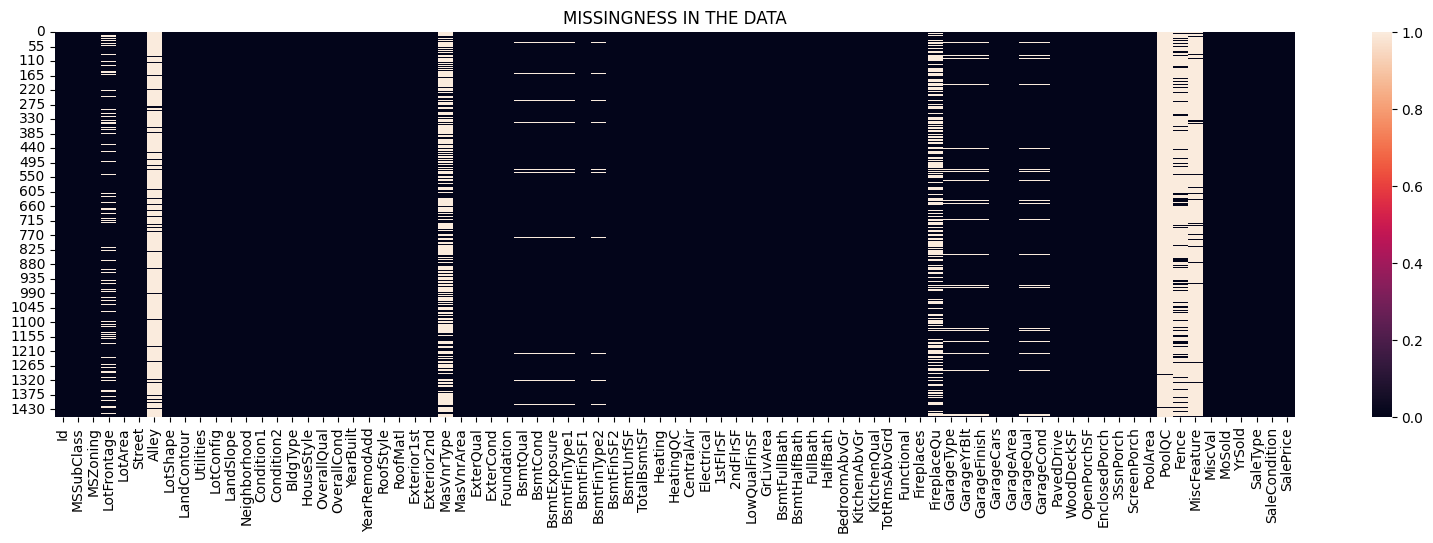

In [11]:
plt.figure(figsize=(20,5))
sns.heatmap(data.isnull())
plt.title('MISSINGNESS IN THE DATA')

In [12]:
data.drop(columns=["Id","Alley","MiscFeature","Fence","PoolQC"], inplace=True )

In [106]:
#plt.figure(figsize=(20,5))
#sns.heatmap(data.isnull())
#plt.title('MISSINGNESS IN THE DATA')

## Explore all the categorical variables 

In [13]:
## get their names first 
categorical=data.select_dtypes(include=[object])
categorical.head(2)

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,Gd,Typ,NaN,Attchd,RFn,TA,TA,Y,WD,Normal
1,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,...,TA,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal


### exploring numerical variables 

In [14]:
numerical=data.select_dtypes(include=[np.number])
#numerical.columns

In [15]:
numerical.head(2)

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,61,0,0,0,0,0,2,2008,208500
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,298,0,0,0,0,0,0,5,2007,181500


In [16]:
# for column in numerical:
#     plt.figure(figsize=(4, 2))
#     sns.boxplot(x=data[column])
#     plt.title(f'Box plot for {column}')
#     plt.show()


<Axes: xlabel='MSSubClass'>

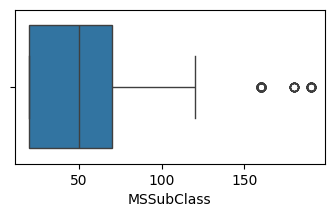

In [17]:
plt.figure(figsize=(4, 2))
sns.boxplot(x=data["MSSubClass"])

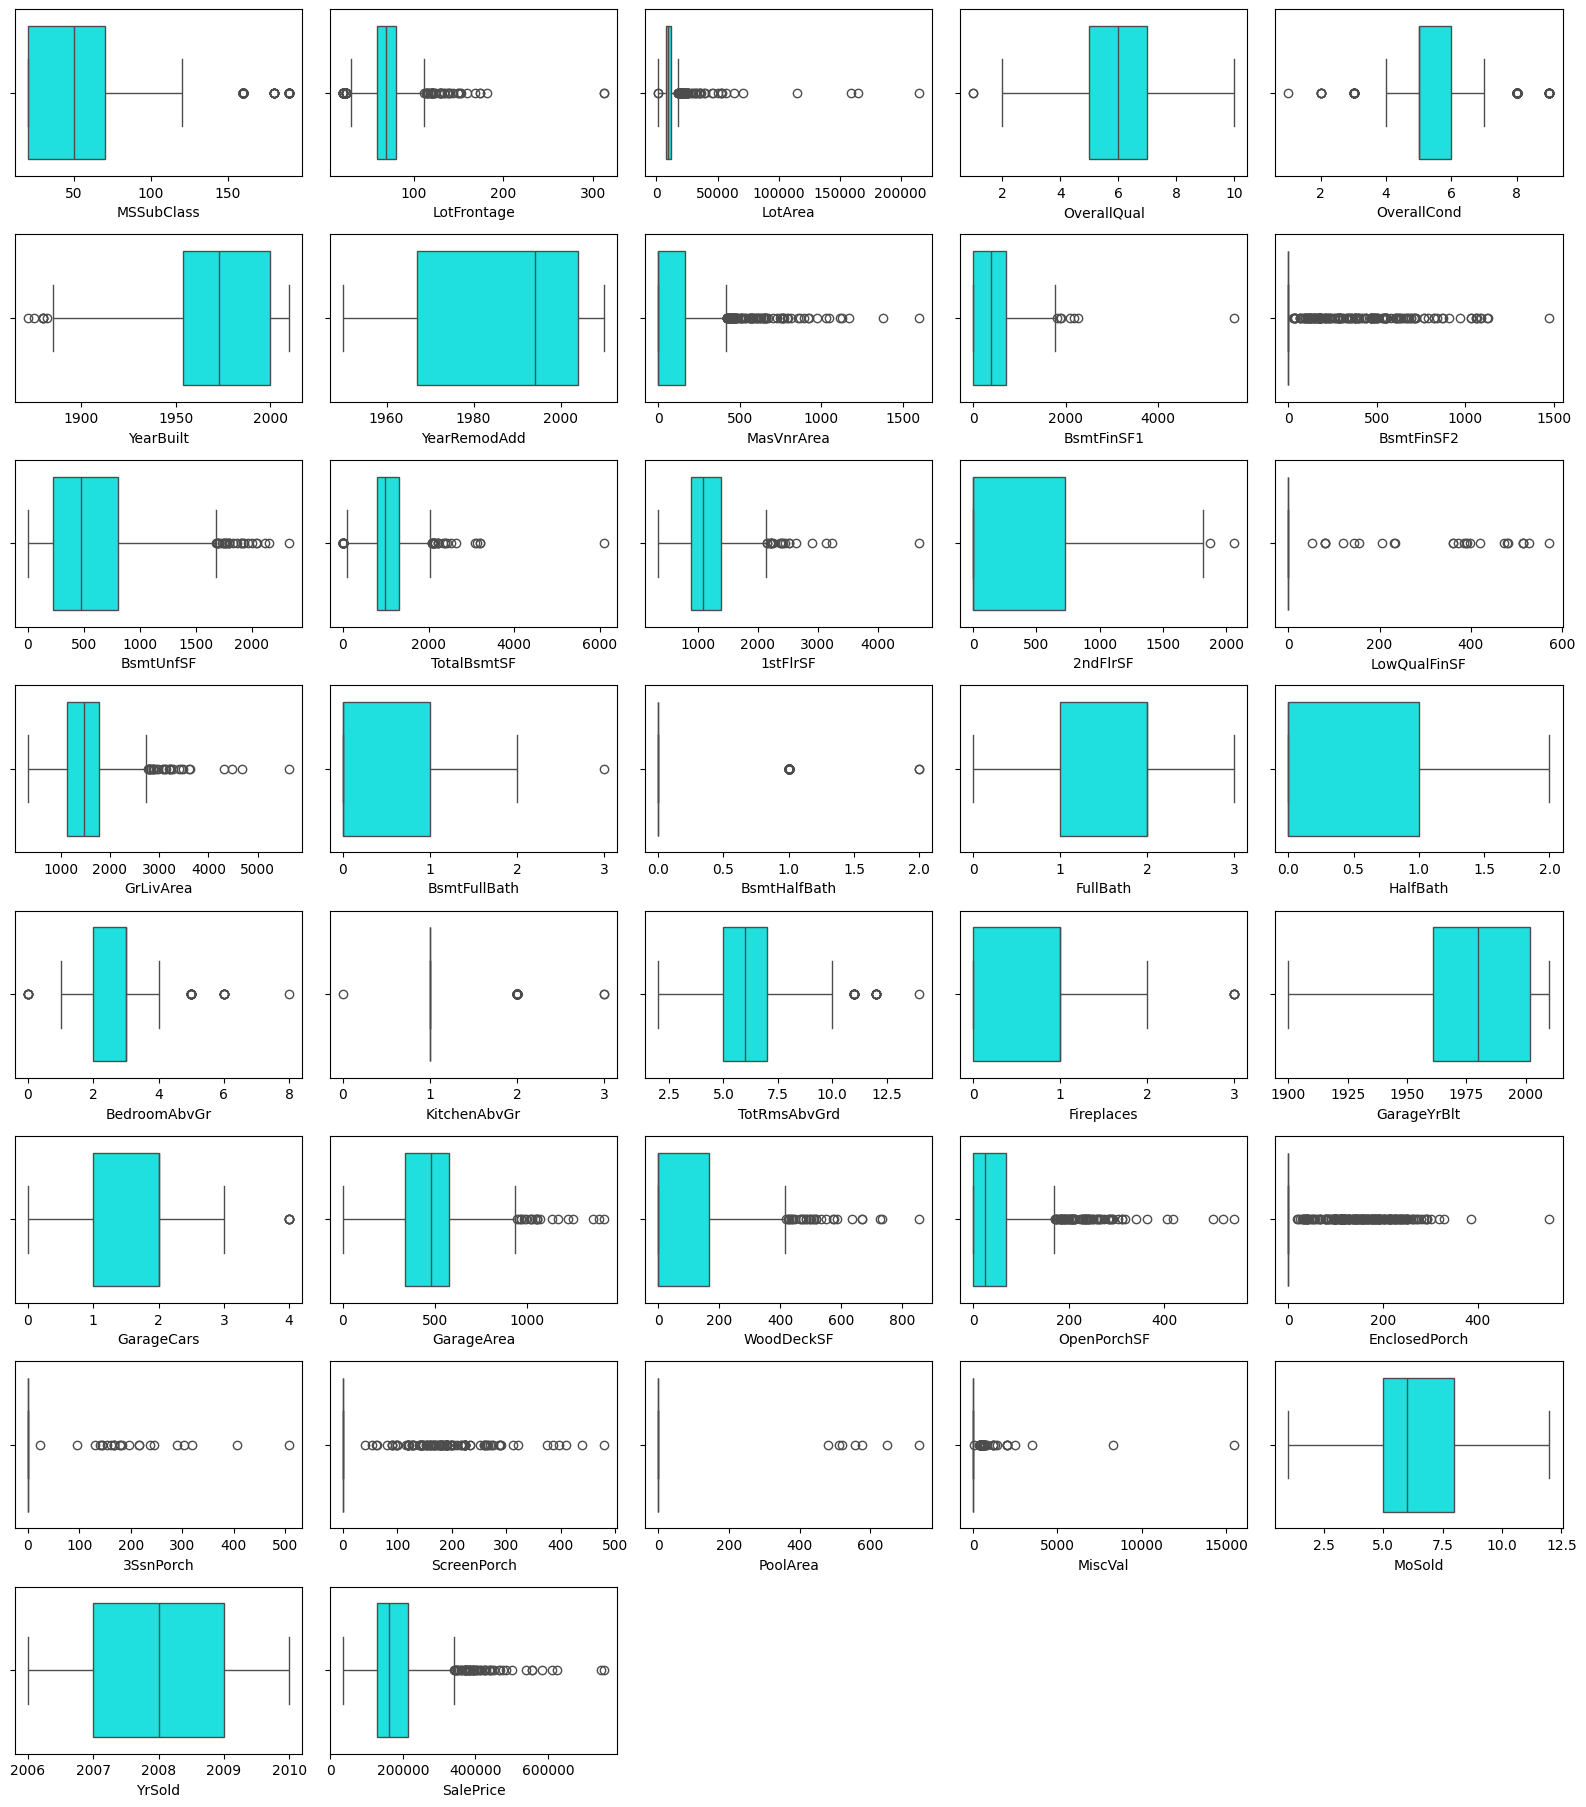

In [18]:
fig=plt.figure(figsize=(16,20))
for var in range(len(numerical.columns)):
    fig.add_subplot(9,5,var+1)
    sns.boxplot(x=numerical.iloc[:,var],color="cyan")
plt.tight_layout()
plt.show()

# How to deal with the missing values

- categorical data i used mode to deal with the missingness
- I imputed by mode to cater for missingness


In [19]:
categorical.columns[categorical.isnull().any()].tolist()

['MasVnrType',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond']

In [20]:
# Calculate mode for each feature in categorical.
mode_values = categorical.mode().iloc[0]

In [21]:
# Impute missing values with mode
categorical = categorical.fillna(mode_values)

- For the numerical data 
- I imputed by mediam to cater for the missing data

In [22]:
numerical.columns[numerical.isnull().any()].tolist()

['LotFrontage', 'MasVnrArea', 'GarageYrBlt']

In [23]:
median_value = numerical.median()
numerical = numerical.fillna(median_value)

In [24]:
numerical.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,61,0,0,0,0,0,2,2008,208500
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,298,0,0,0,0,0,0,5,2007,181500
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,42,0,0,0,0,0,9,2008,223500
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,35,272,0,0,0,0,2,2006,140000
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,192,84,0,0,0,0,0,12,2008,250000


In [25]:
categorical.head()

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,Gd,Typ,Gd,Attchd,RFn,TA,TA,Y,WD,Normal
1,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,...,TA,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal
2,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal
3,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,...,Gd,Typ,Gd,Detchd,Unf,TA,TA,Y,WD,Abnorml
4,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,...,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal


In [26]:
le = LabelEncoder()
for col in categorical:
    categorical[col] = le.fit_transform(categorical[col])

In [27]:
categorical.head()

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,3,1,3,3,0,4,0,5,2,2,...,2,6,2,1,1,4,4,2,8,4
1,3,1,3,3,0,2,0,24,1,2,...,3,6,4,1,1,4,4,2,8,4
2,3,1,0,3,0,4,0,5,2,2,...,2,6,4,1,1,4,4,2,8,4
3,3,1,0,3,0,0,0,6,2,2,...,2,6,2,5,2,4,4,2,8,0
4,3,1,0,3,0,2,0,15,2,2,...,2,6,4,1,1,4,4,2,8,4


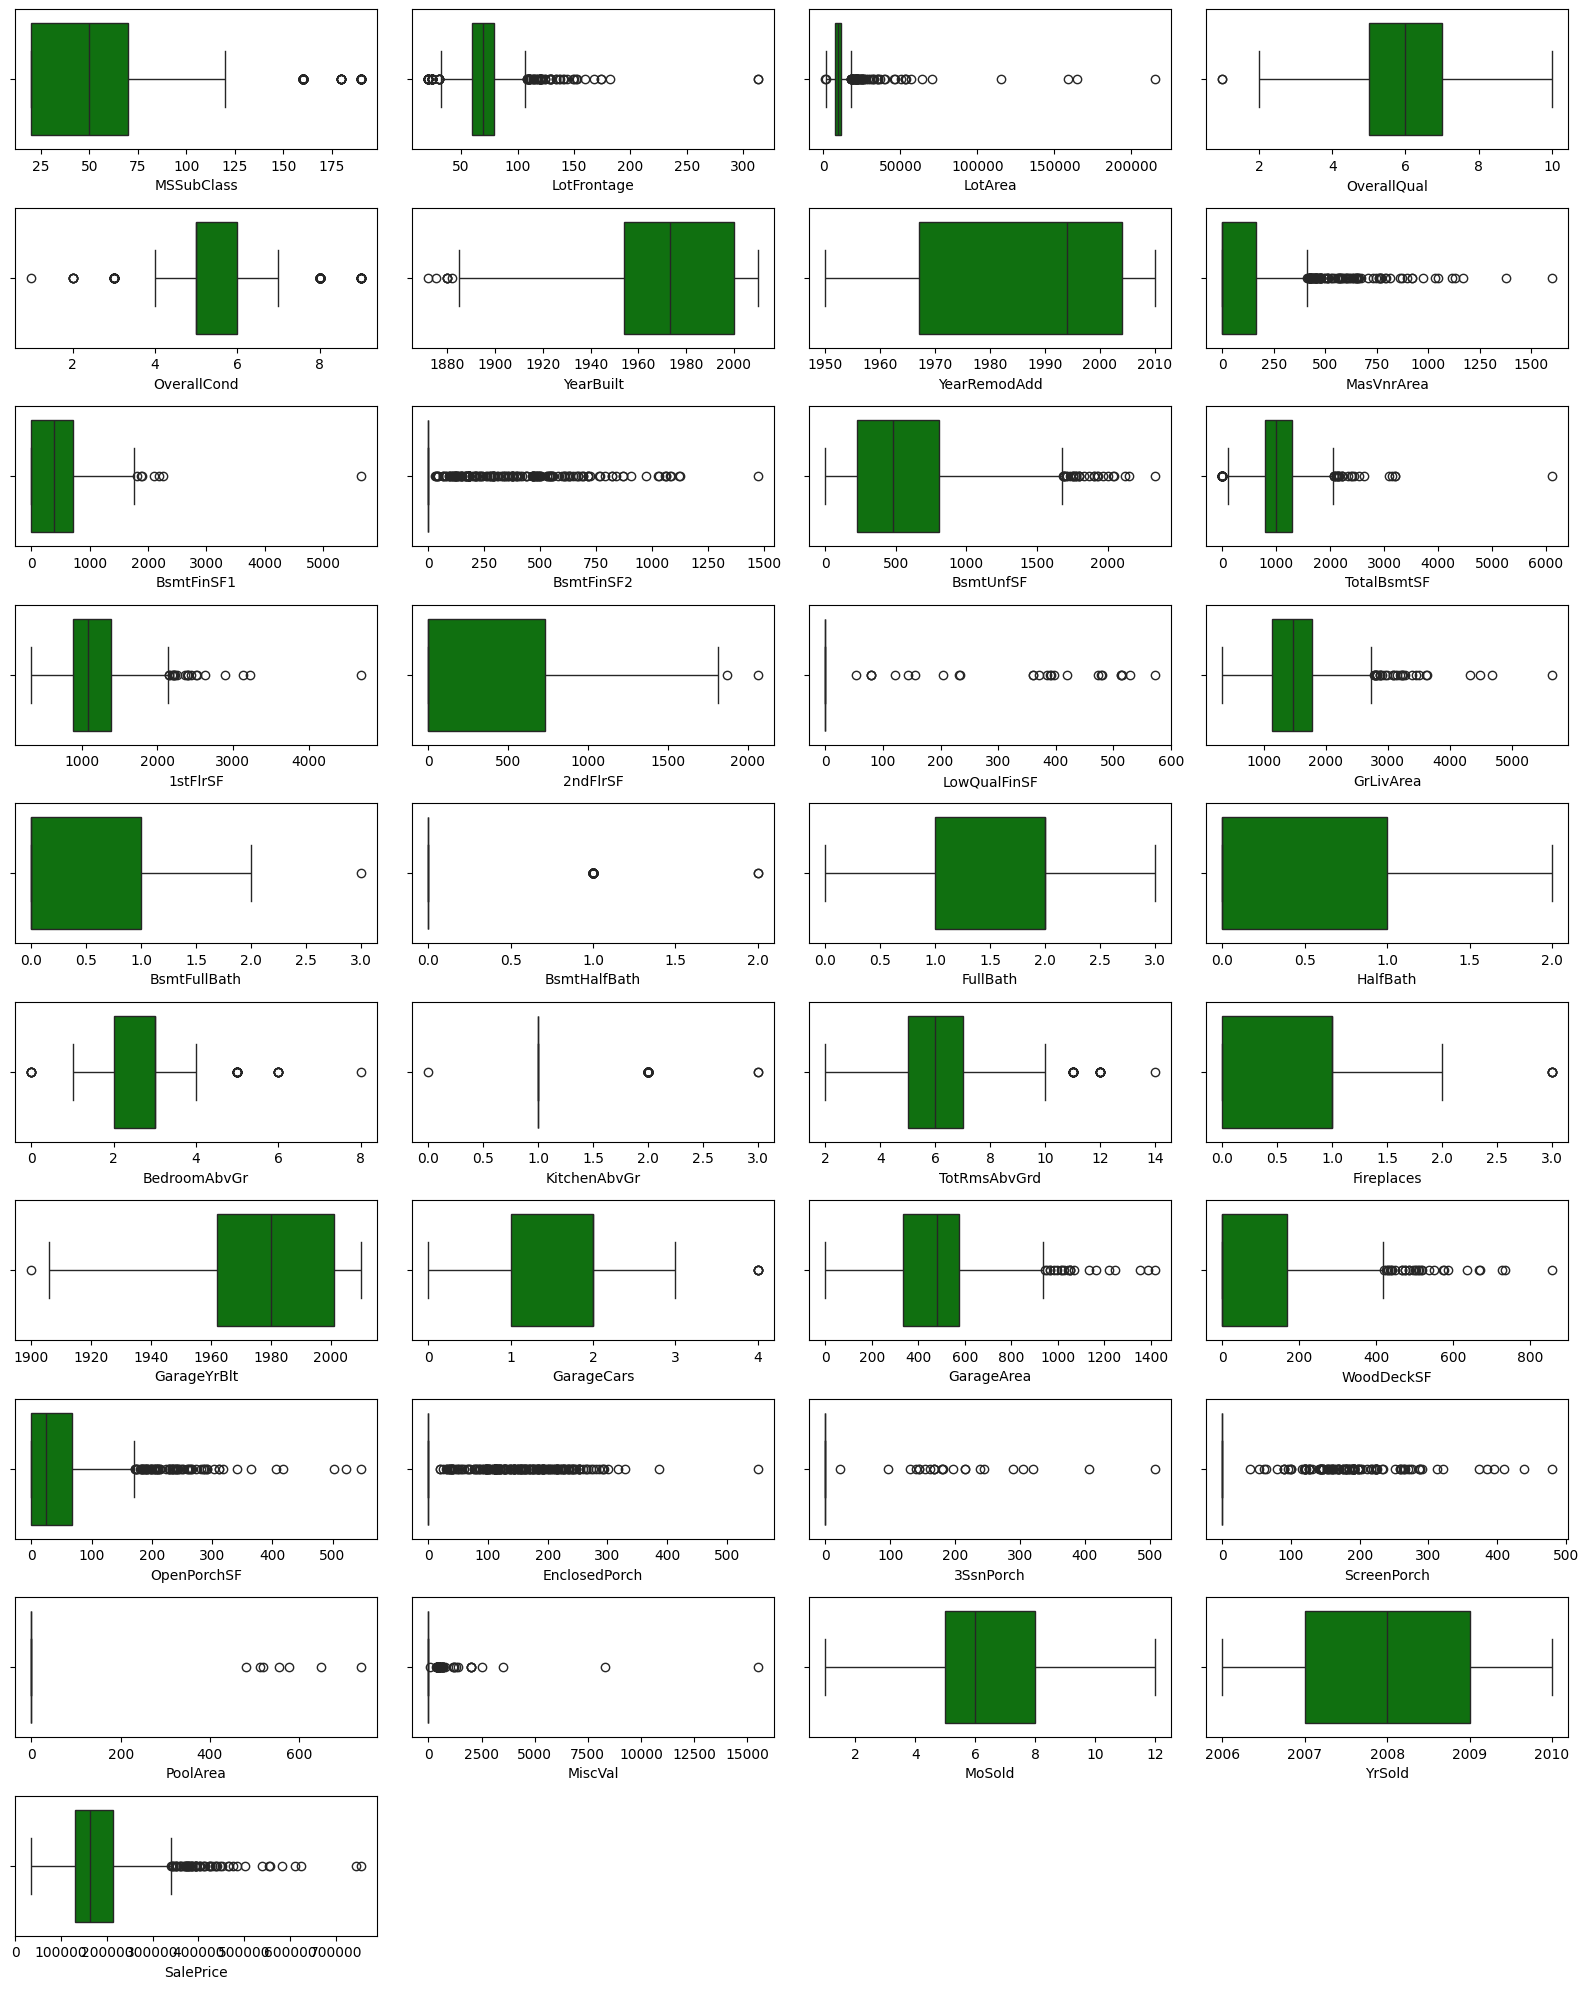

In [31]:
fig=plt.figure(figsize=(16,20))
for var in range(len(numerical.columns)):
    fig.add_subplot(10,4,var+1)
    sns.boxplot(x=numerical.iloc[:,var],color="green")
plt.tight_layout()
plt.show()

## Joining my data sets

In [124]:
# combine the two datasets
df1 = pd.concat([categorical,numerical],axis=1)

In [125]:
df1.head()

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,3,1,3,3,0,4,0,5,2,2,...,0,61,0,0,0,0,0,2,2008,208500
1,3,1,3,3,0,2,0,24,1,2,...,298,0,0,0,0,0,0,5,2007,181500
2,3,1,0,3,0,4,0,5,2,2,...,0,42,0,0,0,0,0,9,2008,223500
3,3,1,0,3,0,0,0,6,2,2,...,0,35,272,0,0,0,0,2,2006,140000
4,3,1,0,3,0,2,0,15,2,2,...,192,84,0,0,0,0,0,12,2008,250000


In [126]:
## Data Separation into the X and y matrices
X = df1.drop("SalePrice",axis=1)
y =df1["SalePrice"]

In [127]:
# Scaling 
scaler = RobustScaler()
X = pd.DataFrame(scaler.fit_transform(X),columns=X.columns)

In [129]:
# separate training and test sets 
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.3, random_state=40)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(1022, 75) (438, 75) (1022,) (438,)


In [130]:
# fitting a simple linear regression model 
model_reg = LinearRegression()
model_reg.fit(X_train,y_train)
y_hat = model_reg.predict(X_test)
r2_score(y_test,y_hat)

0.8640344741173676

In [131]:
# fitting a random forest regression model 
model_reg = RandomForestRegressor(n_estimators=1000)
model_reg.fit(X_train,y_train)
y_hat = model_reg.predict(X_test)
r2_score(y_test,y_hat)

0.8846166193471778